In [1]:
# PROJECT/IMPLEMENTATION IDEAS
# 1. Historical market cap, % bitcoin (requires crawling https://coinmarketcap.com/historical/)
# 2. Twitter sentiment analysis of Bitcoin vs price
# 3. Bitcoin vs. altcoin market caps
# 4. Transaction fees, user/address count(?), other features(?) vs bitcoin price
# 5. Usage by country
# 6. Bitcoin trading by exchange
# 7. Bitcoin trading by currency

In [2]:
import requests
from bs4 import BeautifulSoup
import dateutil.parser
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import time
import sys

# APIs
import quandl
import coinmarketcap

In [3]:
sys.executable

'/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/bin/python'

In [4]:
# Helper functions
def to_currency(int):
    return "${:,.0f}".format(int//1000000)

def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

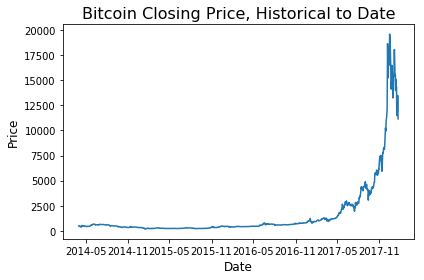

None


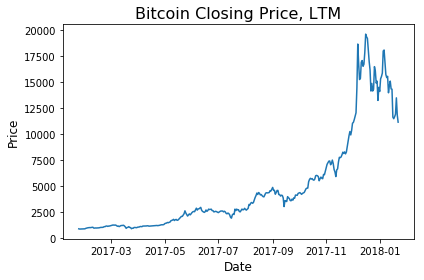

None


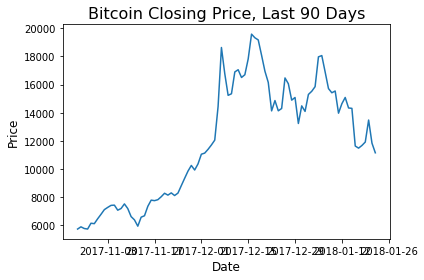

None


In [34]:
# Bitcoin prices, called via Quandl API
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BNC3/GWA_BTC.csv?api_key=pvPBMBW8afR_HqVfio9o')
mydata['Date']=mydata['Date'].apply(to_date)
y = pd.Series(mydata['Close'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Closing Price, Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCPriceQuandl.png')
print(plt.show())

mydata = mydata[:365]
y = pd.Series(mydata['Close'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Closing Price, LTM",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('LTMBTCPriceQuandl.png')
print(plt.show())

mydata = mydata[:90]
y = pd.Series(mydata['Close'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Closing Price, Last 90 Days",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('90DBTCPriceQuandl.png')
print(plt.show())

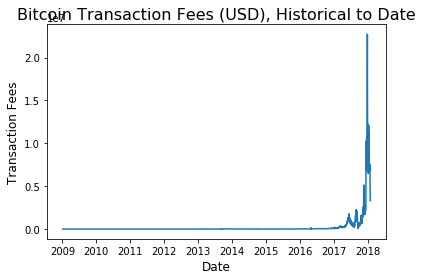

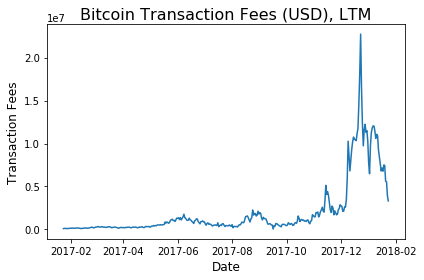

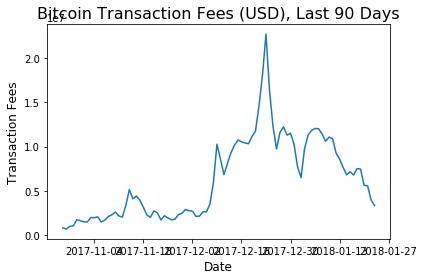

In [35]:
# Quandl: BTC transaction fees USD
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BCHAIN/TRFUS.csv?api_key=pvPBMBW8afR_HqVfio9o')
mydata['Date']=mydata['Date'].apply(to_date)
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Transaction Fees (USD), Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transaction Fees', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCTxnFeesQuandl.png')
plt.show()

mydata = mydata[:365]
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Transaction Fees (USD), LTM",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transaction Fees', fontsize=12)
plt.tight_layout()
plt.savefig('LTMBTCTxnFeesQuandl.png')
plt.show()

mydata = mydata[:90]
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Transaction Fees (USD), Last 90 Days",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transaction Fees', fontsize=12)
plt.tight_layout()
plt.savefig('90DBTCTxnFeesQuandl.png')
plt.show()

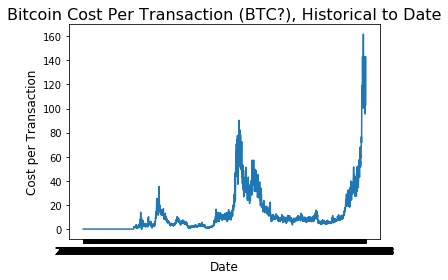

In [7]:
# Quandl: BTC Cost Per Transaction BTC(?)
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BCHAIN/CPTRA.csv?api_key=pvPBMBW8afR_HqVfio9o')
mydata['Date']=mydata['Date'].apply(to_date)
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Cost Per Transaction (BTC?), Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cost per Transaction', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCCostperTxnQuandl.png')
plt.show()

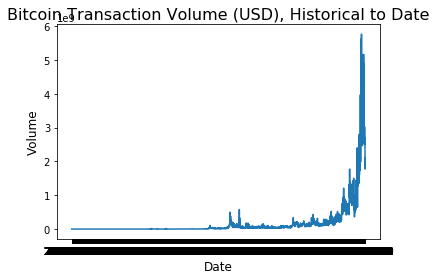

In [8]:
# Quandl: BTC transaction volume USD
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BCHAIN/ETRVU.csv?api_key=pvPBMBW8afR_HqVfio9o')
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Transaction Volume (USD), Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCTxnVolQuandl.png')
plt.show()

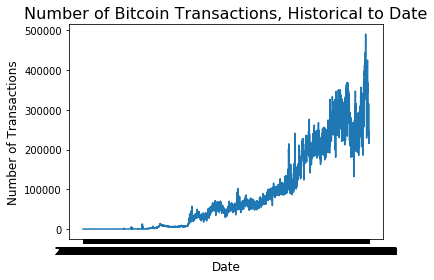

In [9]:
# Quandl: # BTC Transactions
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BCHAIN/NTRAN.csv?api_key=pvPBMBW8afR_HqVfio9o')
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Number of Bitcoin Transactions, Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCTxnAmtQuandl.png')
plt.show()

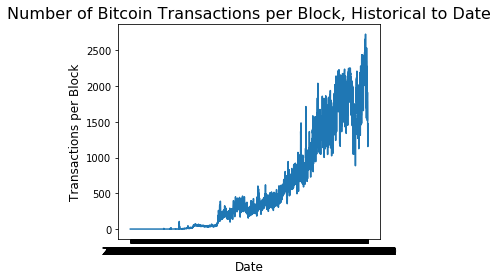

In [10]:
# Quandl: # BTC Transactions per Block
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BCHAIN/NTRBL.csv?api_key=pvPBMBW8afR_HqVfio9o')
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Number of Bitcoin Transactions per Block, Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transactions per Block', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCTxnperBlockQuandl.png')
plt.show()

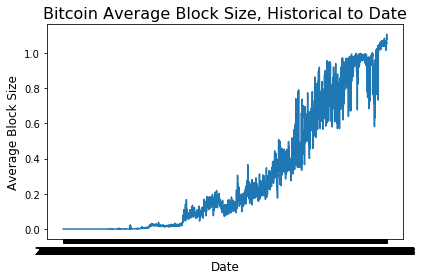

In [11]:
# Quandl: BTC Average Block Size
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BCHAIN/AVBLS.csv?api_key=pvPBMBW8afR_HqVfio9o')
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Average Block Size, Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Block Size', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCAvgBlockSizeQuandl.png')
plt.show()

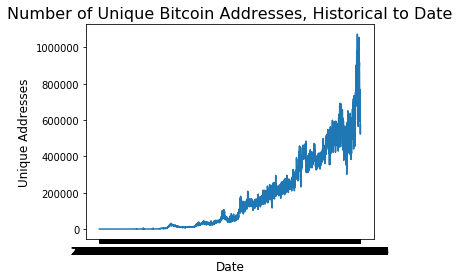

In [12]:
# Quandl: Unique BTC Addresses
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BCHAIN/NADDU.csv?api_key=pvPBMBW8afR_HqVfio9o')
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Number of Unique Bitcoin Addresses, Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unique Addresses', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCNoAddressesQuandl.png')
plt.show()

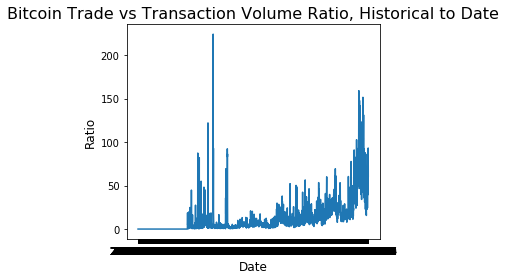

In [13]:
# Quandl: BTC Trade vs Transaction Volume Ratio
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BCHAIN/TVTVR.csv?api_key=pvPBMBW8afR_HqVfio9o')
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Trade vs Transaction Volume Ratio, Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCTradevsTxnVolRatioQuandl.png')
plt.show()

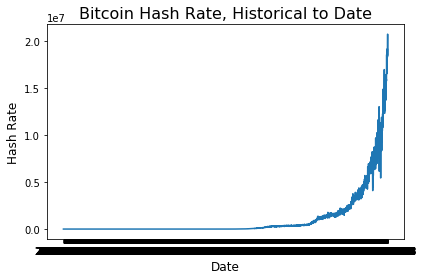

In [14]:
# Quandl: BTC Hash Rate
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BCHAIN/HRATE.csv?api_key=pvPBMBW8afR_HqVfio9o')
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Hash Rate, Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Hash Rate', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCHashRateQuandl.png')
plt.show()

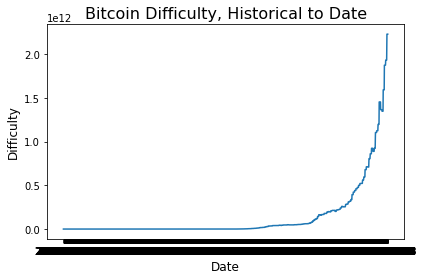

In [15]:
# Quandl: BTC Difficulty
mydata = pd.read_csv('https://www.quandl.com/api/v3/datasets/BCHAIN/DIFF.csv?api_key=pvPBMBW8afR_HqVfio9o')
y = pd.Series(mydata['Value'])
x = pd.Series(mydata['Date'])

plt.plot(x,y)
plt.title("Bitcoin Difficulty, Historical to Date",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Difficulty', fontsize=12)
plt.tight_layout()
plt.savefig('HistBTCDifficultyQuandl.png')
plt.show()

In [16]:
# Coinmarketcap API; apparently no time series data available 
# http://blockxchain.org/2017/05/29/importing-altcoin-data-with-python-and-the-coinmarketcap-api/
market = coinmarketcap.Market()
coin = market.ticker("ethereum")
coin

[{'24h_volume_usd': '3566360000.0',
  'available_supply': '97169480.0',
  'cached': False,
  'id': 'ethereum',
  'last_updated': '1516752553',
  'market_cap_usd': '96197591324.0',
  'max_supply': None,
  'name': 'Ethereum',
  'percent_change_1h': '-1.52',
  'percent_change_24h': '-0.64',
  'percent_change_7d': '-2.01',
  'price_btc': '0.0909886',
  'price_usd': '989.998',
  'rank': '2',
  'symbol': 'ETH',
  'total_supply': '97169480.0'}]

In [17]:
# Coinmarketcap: Current
url = 'https://coinmarketcap.com/all/views/all/'
response=requests.get(url)
page=response.text
soup=BeautifulSoup(page,"lxml")

tables=soup.find_all("table")

rows=[row for row in tables[0].find_all('tr')]
df = pd.read_html(tables[0].prettify())[0]
df.head()

,#,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d
0,1,BTC Bitcoin,BTC,"$183,777,346,319",$10924.70,16822187,"$9,602,100,000",-1.70%,0.70%,-2.07%
1,2,ETH Ethereum,ETH,"$96,197,591,324",$990.00,97169480,"$3,566,360,000",-1.52%,-0.64%,-2.01%
2,3,XRP Ripple,XRP,"$52,028,993,144",$1.34,"38,739,142,811 *","$2,906,820,000",-2.38%,2.46%,15.74%
3,4,BCH Bitcoin Cash,BCH,"$27,461,067,983",$1622.20,16928288,"$548,640,000",-2.15%,-0.06%,-8.27%
4,5,ADA Cardano,ADA,"$14,651,206,072",$0.565093,"25,927,070,538 *","$369,006,000",-2.36%,-0.31%,-2.47%


In [18]:
# Coinmarketcap: weekly beginning in 2013; would ideally like to crawl this to compile all weekly snapshots
# into a single table
url = 'https://coinmarketcap.com/historical/20130428/'
response=requests.get(url)
page=response.text
soup=BeautifulSoup(page,"lxml")

tables=soup.find_all("table")

rows=[row for row in tables[0].find_all('tr')]
df = pd.read_html(tables[0].prettify())[0]
df.head()

,#,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d
0,1,BTC Bitcoin,BTC,"$1,503,882,095",$135.58,11092162,Low Vol,0.32%,?,?
1,2,LTC Litecoin,LTC,"$74,426,612",$4.33,17170739,Low Vol,0.12%,?,?
2,3,PPC Peercoin,PPC,"$7,311,640",$0.389696,18762419,Low Vol,0.08%,?,?
3,4,NMC Namecoin,NMC,"$6,414,722",$1.18,5417308,Low Vol,1.37%,?,?
4,5,TRC Terracoin,TRC,"$1,522,275",$0.654561,2325642,Low Vol,0.53%,?,?


        Date     Open     High      Low    Close       Volume    Market Cap
0 2018-01-22  11633.1  11966.4  10240.2  10931.4  10537400000  195645000000
1 2018-01-21  12889.2  12895.9  11288.2  11600.1   9935180000  216740000000
2 2018-01-20  11656.2  13103.0  11656.2  12899.2  11801700000  195979000000
3 2018-01-19  11429.8  11992.8  11172.1  11607.4  10740400000  192150000000
4 2018-01-18  11198.8  12107.3  10942.5  11474.9  15020400000  188242000000


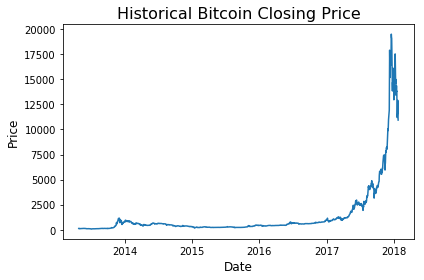

None


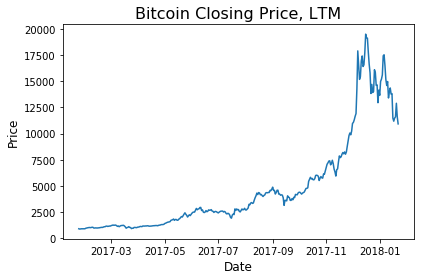

None


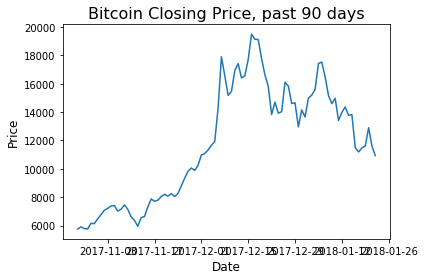

In [19]:
# Coinmarketcap scraping: Bitcoin by time period
url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20180123'
response=requests.get(url)
page=response.text
soup=BeautifulSoup(page,"lxml")
tables=soup.find_all("table")

rows=[row for row in tables[0].find_all('tr')]
df = pd.read_html(tables[0].prettify())[0]
df['Date']=df['Date'].apply(to_date)
print(df.head())

y = pd.Series(df['Close'])
x = pd.Series(df['Date'])

plt.plot(x,y)
plt.title("Historical Bitcoin Closing Price",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('HistoricalBitcoinPrice.png')
print(plt.show())

# Bitcoin Closing Price, past year
df = df[:365]
y = pd.Series(df['Close'])
x = pd.Series(df['Date'])

plt.plot(x,y)
plt.title("Bitcoin Closing Price, LTM",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('BitcoinPrice2017.png')
print(plt.show())

# Bitcoin past 90 days
df = df[:90]
y = pd.Series(df['Close'])
x = pd.Series(df['Date'])

plt.plot(x,y)
plt.title("Bitcoin Closing Price, past 90 days",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('BitcoinPrice2017.png')
plt.show()

        Date     Open     High      Low    Close      Volume    Market Cap
0 2018-01-22  1055.35  1089.10   930.74  1003.26  3810100000  102504000000
1 2018-01-21  1155.68  1155.68  1021.50  1049.58  3378090000  112226000000
2 2018-01-20  1044.95  1167.11  1044.95  1155.15  3975190000  101451000000
3 2018-01-19  1028.82  1093.22  1003.71  1039.10  4084450000   99863900000
4 2018-01-18  1016.44  1100.31   967.76  1036.28  5938320000   98642100000


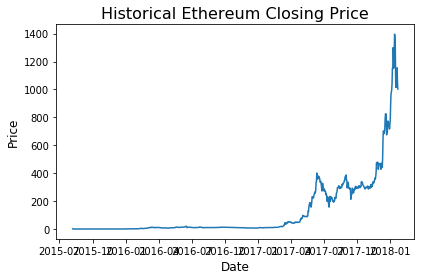

None
          Date   Open   High    Low  Close   Volume Market Cap
360 2017-01-27  10.58  10.61  10.44  10.54  7189170  934404000
361 2017-01-26  10.57  10.67  10.51  10.59  8465020  932575000
362 2017-01-25  10.62  10.62  10.48  10.57  6751450  936769000
363 2017-01-24  10.73  10.77  10.57  10.63  8327330  946083000
364 2017-01-23  10.71  10.84  10.67  10.82  7267210  944159000


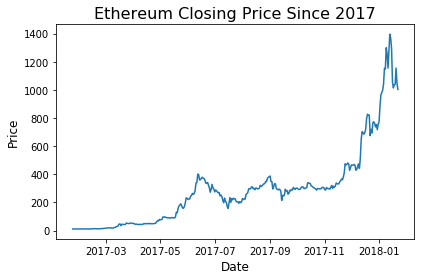

None
          Date   Open   High    Low  Close   Volume Market Cap
360 2017-01-27  10.58  10.61  10.44  10.54  7189170  934404000
361 2017-01-26  10.57  10.67  10.51  10.59  8465020  932575000
362 2017-01-25  10.62  10.62  10.48  10.57  6751450  936769000
363 2017-01-24  10.73  10.77  10.57  10.63  8327330  946083000
364 2017-01-23  10.71  10.84  10.67  10.82  7267210  944159000


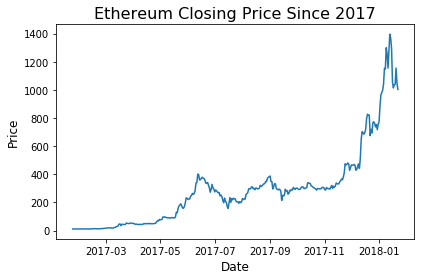

In [20]:
# Coinmarketcap scraping: Ethereum
url = 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end=20180123'
response=requests.get(url)
page=response.text
soup=BeautifulSoup(page,"lxml")
tables=soup.find_all("table")

rows=[row for row in tables[0].find_all('tr')]
df = pd.read_html(tables[0].prettify())[0]
df['Date']=df['Date'].apply(to_date)
print(df.head())

y = pd.Series(df['Close'])
x = pd.Series(df['Date'])

plt.plot(x,y)
plt.title("Historical Ethereum Closing Price",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('HistoricalEthereumPrice.png')
print(plt.show())

# LTM
df = df[:365]
print(df.tail())
y = pd.Series(df['Close'])
x = pd.Series(df['Date'])

plt.plot(x,y)
plt.title("Ethereum Closing Price Since 2017",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('EthereumPrice2017.png')
print(plt.show())

# Last 90 days
df = df[:365]
print(df.tail())
y = pd.Series(df['Close'])
x = pd.Series(df['Date'])

plt.plot(x,y)
plt.title("Ethereum Closing Price Since 2017",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('EthereumPrice2017.png')
plt.show()

In [21]:
# Bitcoin futures scraping
url = 'http://www.cmegroup.com/trading/equity-index/us-index/bitcoin.html'
response=requests.get(url)
page=response.text
soup=BeautifulSoup(page,"lxml")

tables=soup.find_all("table")

rows=[row for row in tables[0].find_all('tr')]
df = pd.read_html(tables[0].prettify())[0]
df = df[:5]
df

,Month,Charts,Last,Change,Prior Settle,Open,High,Low,Volume,Hi / Low Limit,Updated
0,JAN 2018,Show Price Chart,10785,-310,11095.0,10790,11080,10785,50.0,11870 / 10320,17:54:55 CT 23 Jan 2018
1,FEB 2018,Show Price Chart,10850,-280,11130.0,10920,11100,10845,20.0,11905 / 10355,17:58:35 CT 23 Jan 2018
2,MAR 2018,Show Price Chart,10945,-240,11185.0,11130,11130,10945,4.0,11940 / 10390,17:54:25 CT 23 Jan 2018
3,APR 2018,Show Price Chart,-,-,0.0,-,-,-,0.0,-,16:45:00 CT 23 Jan 2018
4,JUN 2018,Show Price Chart,-,-,11320.0,-,-,-,0.0,12075 / 10525,16:47:18 CT 23 Jan 2018


In [22]:
# Twitter sentiment anlysis
import tweepy
from tweepy import OAuthHandler

consumer_key = 'vZ2rePzW00X6Mr2NVbxcRUSMm'
consumer_secret = 'XkT96BYG7RBJKBdKP2uBl2z4WzPVjTbH155bUldCDT1xVdGiVM'
access_token = '66541059-BLlhwk0IE57qhXQux6XjCKOeVy5MC8NxWR6yaoKQa'
access_secret = 'RWiaKbiPXVZwRslwr9KEWd6ELn4MvEn6eCRSo8npkkZ8t'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [23]:
def process_or_store(tweet):
    print(json.dumps(tweet))

In [24]:
# import pandas
# import json

# from tweepy import Stream
# from tweepy.streaming import StreamListener

# class MyListener(StreamListener):

#     def on_data(self, data):
#         try:
#             with open('python.json', 'a') as f:
#                 f.write(data)
#                 return True
#         except BaseException as e:
#             print("Error on_data: %s" % str(e))
#         return True

#     def on_error(self, status):
#         print(status)
#         return True

# twitter_stream = Stream(auth, MyListener())
# twitter_stream.filter(track=['#python'])




In [25]:
# dates_ITAvWAL = []
# # f is the file pointer to the JSON data set
# for line in f:
#     tweet = json.loads(line)
#     # let's focus on hashtags only at the moment
#     terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#')]
#     # track when the hashtag is mentioned
#     if '#itavwal' in terms_hash:
#         dates_ITAvWAL.append(tweet['created_at'])
 
# # a list of "1" to count the hashtags
# ones = [1]*len(dates_ITAvWAL)
# # the index of the series
# idx = pandas.DatetimeIndex(dates_ITAvWAL)
# # the actual series (at series of 1s for the moment)
# ITAvWAL = pandas.Series(ones, index=idx)
 
# # Resampling / bucketing
# per_minute = ITAvWAL.resample('1Min', how='sum').fillna(0)

In [26]:
# import pandas
# import json

# from tweepy import Stream
# from tweepy.streaming import StreamListener

# class MyListener(StreamListener):

#     def on_data(self, data):
#         try:
#             with open('bitcoin.json', 'a') as f:
#                 f.write(data)
#                 return True
#         except BaseException as e:
#             print("Error on_data: %s" % str(e))
#         return True

#     def on_error(self, status):
#         print(status)
#         return True

# twitter_stream = Stream(auth, MyListener())
# twitter_stream.filter(track=['#bitcoin'])

In [27]:
import json

with open('python.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dict
    print(json.dumps(tweet, indent=4)) # pretty-print

{
    "timestamp_ms": "1516737371361",
    "filter_level": "low",
    "place": null,
    "retweet_count": 0,
    "retweeted_status": {
        "filter_level": "low",
        "place": null,
        "retweet_count": 231,
        "is_quote_status": false,
        "in_reply_to_screen_name": null,
        "in_reply_to_status_id_str": null,
        "retweeted": false,
        "lang": "en",
        "truncated": false,
        "possibly_sensitive": false,
        "reply_count": 1,
        "created_at": "Tue Jul 25 22:06:46 +0000 2017",
        "display_text_range": [
            0,
            88
        ],
        "user": {
            "protected": false,
            "location": "New York, NY",
            "friends_count": 7772,
            "profile_background_tile": false,
            "profile_banner_url": "https://pbs.twimg.com/profile_banners/2709863209/1483920659",
            "following": null,
            "profile_use_background_image": false,
            "lang": "en",
            "stat

In [30]:
# public_tweets = api.search('Bitcoin')

# for tweet in public_tweets:
#     print(tweet.text)
#     analysis = TextBlob(tweet.text)
#     print(analysis.sentiment)

In [ ]:
# Resources
# https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/
# http://cs229.stanford.edu/proj2015/029_report.pdf
# http://text-processing.com/ API